# The simplest deep network

The aim of this exercise is to investigate how even the simplest possible "deep network" can lead to instabilities (or at least difficulties) in learning, and how a small amount of regularisation can improve this. 

This exercise shows how regularisation is desirable when there is a large set of equally good solutions, but some of these "equally good" solutions have very large and very small weights. 

In [1]:
# our standard imports, and the command to make plots appear within the notebook

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

First let's make some data. 

$y = x + \mathrm{noise}$

In [2]:
xx = 10 * ( np.random.random([1000]) - 0.5)
yy = xx + 0.5 * np.random.randn(1000)

In [3]:
xx.shape, yy.shape # always check what you have produced, and then plot it! 

((1000,), (1000,))

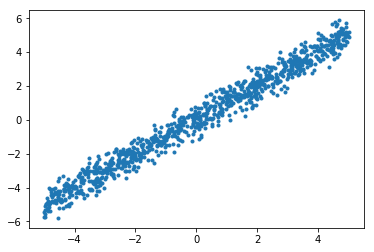

In [4]:
plt.plot(xx, yy,'.')

Stochastic gradient descent to estimate $w$ in $\hat{y}=wx$, and squared loss.

The loss (for a single data item with $x$, prediction $\hat{y}$, and true value $y$) is: $J = \frac{1}{2} (\hat{y} - y)^2$

The prediction is:  $\hat{y} = w x $

We put in the factor of $\frac{1}{2}$ in the definition of $J$ for convenience, so we don't have factors of 2 in all the derivatives. 

So $$\frac{\partial J}{\partial w} = (\hat{y} - y) \frac{\partial \hat{y}}{ \partial w}  = (\hat{y} - y) x$$

Gradient descent for $w$ is implemented below. 

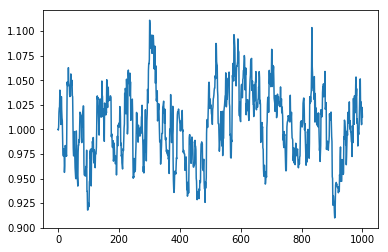

In [5]:
# Let's start with w set to be the exact correct value ! 
w = 1.0 

# ww will correct values of w after they are updated by each data point
ww = [w]

learning_rate = 0.01

for x,y in zip(xx,yy):
    yhat = w * x 
    grad = (yhat - y) * x 
    w = w - learning_rate * grad
    ww.append(w) # collect each new value of w
    
# Now plot the values of w as they are adjusted during learning

# the values of w should stay close to the optimal value (1.0), but they will vary around it because of 
# stochastic gradient descent updates

# but provided that the learning rate is set low enough, the system is stable. For what value of the 
# learning rate does this become unstable? 

plt.plot(ww)

Now consider a deep model for the same problem and data. 

Have two weights, $w_1$, and $w_2$, and set

$$ \hat{y} = w_1 w_2 x $$

Of course this is not very deep (only two layers!) and it is a very silly model because we just multiply the weights
to produce $w = w_1 w_2$ , which is the same model as before. 

Nevertheless, this is perhaps the simplest possible "deep" model. As we will shortly see, we have introduced instability and we will need regularisation ! 

As before, for a single data item with $x$, prediction $\hat{y}$, and true value $y$, the loss is: 

$$J = \frac{1}{2} (\hat{y} - y)^2$$

In this model the prediction is:  

$$\hat{y} = w_1 w_2 x $$

so 

$$ \frac{\partial \hat{y}}{\partial w_1} = w_2 x $$

and 

$$ \frac{\partial \hat{y}}{\partial w_2} = w_1 x $$

If either of the weights gets large, one of the gradients will become large, and this may cause instability. 

What weights are optimal? Well we only need $w_1 w_2 = 1$, so any values of $w_1$ and $w_2$ are acceptable so long as

$$ w_1 = \frac{1}{w_2}$$

So one weight can become large as long as the other weight becomes small...


Gradient descent for this "deep" model is implemented below






In [26]:
def calculate_J(x,y,w1,w2):
    """
    x, y are ndarrays of the same length
    w1 and w2 are weights of 2 layers of network
    """
    yhat  = w1 * w2 * x
    errs = (yhat - y)**2
    J = np.mean( errs )
    return J

In [27]:
w1_values = np.linspace(0.01,4,100)
w2_values = np.linspace(0.01,4,100)

In [28]:
J_grid = np.zeros([w1_values.size,w2_values.size])

for w1_index in range(0,w1_values.size):
    for w2_index in range(0,w2_values.size):
        J_grid[w1_index,w2_index] = calculate_J(xx, yy, w1_values[w1_index], w2_values[w2_index] )    

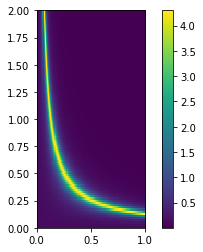

In [31]:
plt.imshow(1/J_grid.transpose(), origin='lower',extent=[0,1,0,2])
plt.colorbar()

In [6]:
# we start off with w1 and w2 different, but with w1 * w2 == 1.0 as before
w1 = 0.7
w2 = 1.0/0.7

# now we will collect both weights as learning proceeds
ww1 = [w1]
ww2 = [w2]

# try learning rates higher and lower than this value
learning_rate = 0.01

for x,y in zip(xx,yy):
    yhat = w1 * w2 * x 
    grad = (yhat - y) * x 
    w1 = w1 - learning_rate * grad * w2
    w2 = w2 - learning_rate * grad * w1
    
    ww1.append(w1) # collect each new value of w1
    ww2.append(w2) # collect each new value of w2
    


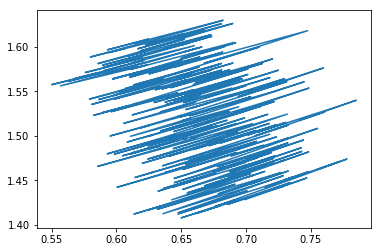

In [7]:
limit = 1000 # this is for you to fill in: find out by trial and error when the estimate goes wild, and plot just up to 
        # an integer you might call 'limit', to see what happened just before the estimated w heads off to infinity
plt.plot(ww1[:limit],ww2[:limit])

In [ ]:
# you can also plot the estimated values of w up until they go wild.  
# The correct value of w is always 1: can you see how the errors get slowly larger until there is a catastrophic growth?

plt.plot( np.array(ww1[:limit]) * np.array(ww2[:limit]))

### Self-help challenge: 

Find out (by googling or by consulting the matplotlib documentation) how to plot a contour plot of $(w_1 w_2 - 1)^2$, for $w_1, w_2 > 0$.  (This is proportional to the expected loss $J$ as a function of $w_1, w_2$ .

It is useful to be able to plot contour plots, and this graph will give you insight as to why the instability occurs

### Introducing regularisation

Now add a regularising term to $J$. 

$$ J = = \frac{1}{2} \left( (\hat{y} - y)^2 + \lambda (w_1^2 + w_2^2) \right)$$

This punishes large values of $w_1$ or $w_2$. 

$$ \frac{ \partial J}{\partial w_1} = (\hat{y} - y) w_2 x + \lambda w_1 $$

Exercise: write down $$ \frac{ \partial J}{\partial w_1} $$

The gradient descent code is written below. 

Try out different values of the regulariser : what is the effect of different values? 

What is the effect when the regulariser is too large? 

How small is too small? 

In [ ]:
regulariser = 0.01 # quite big ! Try both larger and smaller values

# we start off with w1 and w2 different, but with w1 * w2 == 1.0 as before
w1 = 0.7
w2 = 1.0/0.7

# now we will collect both weights as learning proceeds
ww1 = [w1]
ww2 = [w2]

yhats = []

# try learning rates higher and lower than this value
learning_rate = 0.019

for x,y in zip(xx,yy):
    yhat = w1 * w2 * x 
    grad = (yhat - y) * x 
    w1 = w1 - learning_rate * grad * w2 - regulariser * w1
    w2 = w2 - learning_rate * grad * w1 - regulariser * w2
    
    yhats.append(yhat)
    ww1.append(w1) # collect each new value of w1
    ww2.append(w2) # collect each new value of w2
    
# now visualise ww1, ww2 as before to see if there has been instability

# also plot yy versus yhats : what happens when the regulariser is too big? 
# What is the compromise involved in introducing regularisation? 